# Panel B - Outlier Counts

This notebook generates a single panel figure and saves PNG/PDF at 600 dpi.

Set `TAPAS_OUTPUT_DIR` if your outputs are elsewhere.


Saved: ..\..\figures\panel_outliers_by_age_sex.png
Saved: ..\..\figures\panel_outliers_by_age_sex.pdf


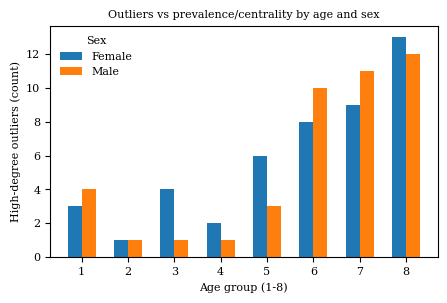

In [13]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OUTPUT_DIR = Path(os.getenv('TAPAS_OUTPUT_DIR', '../../outputs'))
FIG_DIR = OUTPUT_DIR / 'figures'
FIG_DIR.mkdir(parents=True, exist_ok=True)

FIG_DIR = Path('./../../figures/')
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 8, 'axes.titlesize': 8, 'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 8})


def save_figure(fig, name_base):
    png_path = FIG_DIR / f"{name_base}.png"
    pdf_path = FIG_DIR / f"{name_base}.pdf"
    fig.savefig(png_path, dpi=600, bbox_inches='tight', transparent=True)
    fig.savefig(pdf_path, dpi=600, bbox_inches='tight', transparent=True)
    print(f"Saved: {png_path}")
    print(f"Saved: {pdf_path}")

DATA_DIR = Path(os.getenv('TAPAS_DATA_DIR', '../../Data'))
OUTLIERS_PATH = DATA_DIR / 'high_mortality_sinks_ZSCORE.csv'

if not OUTLIERS_PATH.exists():
    raise FileNotFoundError(f"Missing {OUTLIERS_PATH}. Put outliers_data_FINAL.csv in OUTPUT_DIR.")

df = pd.read_csv(OUTLIERS_PATH)

# Normalize column names
col_map = {c.lower(): c for c in df.columns}
sex_col = col_map.get('sex') or col_map.get('gender') or col_map.get('Sex')
age_col = col_map.get('age_group') or col_map.get('Age_Group')
# outlier_col = col_map.get('outlier_type') or col_map.get('Outlier_Type')

# if sex_col is None or age_col is None or outlier_col is None:
#     raise ValueError('Expected columns for sex, age_group, and outlier_type in outliers_data_FINAL.csv')

# Filter to high-degree outliers (as used for Table 3 overlap)
df_high = df.copy()

# Convert age group like 'age_1' -> 1
if df_high[age_col].dtype == object:
    df_high['age_num'] = df_high[age_col].astype(str).str.replace('age_', '', regex=False).astype(int)
else:
    df_high['age_num'] = df_high[age_col].astype(int)

counts = (
    df_high.groupby([sex_col, 'age_num'])
    .size()
    .reset_index(name='count')
)

fig, ax = plt.subplots(figsize=(5.00, 3.00))
for sex, sub in counts.groupby(sex_col):
    ax.bar(sub['age_num'] + (0.15 if str(sex).lower().startswith('m') else -0.15),
           sub['count'], width=0.3, label=str(sex))

ax.set_xlabel('Age group (1-8)')
ax.set_ylabel('High-degree outliers (count)')
ax.set_title('Outliers vs prevalence/centrality by age and sex')
ax.legend(title='Sex', frameon=False)

save_figure(fig, 'panel_outliers_by_age_sex')
plt.show()


In [14]:
df


,Sex,Age_Group,ICD_Code,Description_GER,Degree,Betweenness,Mortality,z_betweenness,z_mortality,z_product,z_geom_mean,Description_Eng,age_num
0,Female,1,D64,Sonstige Anämien,6,0.000603,0.028660,0.764662,1.819662,1.391427,1.179588,Other anemias,1
1,Female,1,F83,Kombinierte umschriebene Entwicklungsstörungen,4,0.001847,0.006820,3.414281,0.137227,0.468532,0.684494,Mixed specific developmental disorders,1
2,Female,1,J96,"Respiratorische Insuffizienz, anderenorts nich...",9,0.001462,0.032957,2.596020,2.150662,5.583161,2.362871,"Respiratory failure, not elsewhere classified",1
3,Female,2,G40,Epilepsie,5,0.000450,0.002130,1.348589,0.155075,0.209133,0.457310,Epilepsy and recurrent seizures,2
4,Female,3,E66,Adipositas,19,0.003288,0.001251,5.361450,0.086218,0.462254,0.679893,Overweight and obesity,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Male,8,I50,Herzinsuffizienz,123,0.001675,0.178642,0.487507,1.434230,0.699198,0.836180,Heart failure,8
85,Male,8,I70,Atherosklerose,105,0.001498,0.087303,0.417469,0.288107,0.120276,0.346808,Atherosclerosis,8
86,Male,8,J18,"Pneumonie, Erreger nicht näher bezeichnet",110,0.001623,0.200863,0.466998,1.713061,0.799996,0.894425,"Pneumonia, unspecified organism",8
87,Male,8,J44,Sonstige chronische obstruktive Lungenkrankheit,128,0.005099,0.136594,1.838606,0.906610,1.666898,1.291084,Other chronic obstructive pulmonary disease,8


Saved: ..\..\figures\panel_outliers_by_age_sex.png
Saved: ..\..\figures\panel_outliers_by_age_sex.pdf


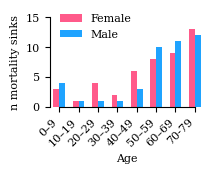

In [15]:
# Update the plot with age group labels (0-9, 10-19, etc.) and remove top/right spines
fig, ax = plt.subplots(figsize=(2.00, 1.16))

# Nicer pastel colors
colors = {'Male': '#1FA3FF', 'Female': '#FF5A8A'}

for sex, sub in counts.groupby(sex_col):
    color = colors.get(sex, '#CCCCCC')
    ax.bar(sub['age_num'] + (0.15 if str(sex).lower().startswith('m') else -0.15),
           sub['count'], width=0.3, label=str(sex), color=color)

# Set age group labels (0-9, 10-19, etc.)
age_labels = ['0–9', '10–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70-79']
ax.set_xticks(range(1, 9))
ax.set_xticklabels(age_labels, rotation=45, ha='right', fontsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.set_xlabel('Age', fontsize=8)
ax.set_ylabel('n mortality sinks', fontsize=8)
ax.legend(frameon=False, fontsize=8, title_fontsize=8, loc='upper left', bbox_to_anchor=(0, 1.15))

# Bound axes at the last ticks
ax.set_xlim(0.5, 8.5)
ax.set_ylim(0, counts['count'].max() + 2)

# Remove top and right spines and set bounds (last tick, first tick)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(8, 1)
ax.spines['left'].set_bounds(counts['count'].max() + 2, 0)

save_figure(fig, 'panel_outliers_by_age_sex')
plt.show()


## Here we do the same with teh bridges

Saved: ..\..\figures\panel_bridge_edges_by_age_sex.png
Saved: ..\..\figures\panel_bridge_edges_by_age_sex.pdf


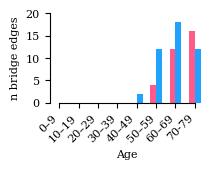

In [16]:
# Load and process bridge edges data, then plot outlier counts by age and sex
BRIDGE_PATH = DATA_DIR / 'bridge_edges_mortality_ZSCORE.csv'
if not BRIDGE_PATH.exists():
    raise FileNotFoundError(f"Missing {BRIDGE_PATH}. Put bridge_edges_mortality_ZSCORE.csv in DATA_DIR.")

df_bridge = pd.read_csv(BRIDGE_PATH)

# Normalize column names
col_map_bridge = {c.lower(): c for c in df_bridge.columns}
sex_col_bridge = col_map_bridge.get('sex') or col_map_bridge.get('gender') or col_map_bridge.get('Sex')
age_col_bridge = col_map_bridge.get('age_group') or col_map_bridge.get('Age_Group')

df_bridge_high = df_bridge.copy()

# Convert age group like 'age_1' -> 1
if df_bridge_high[age_col_bridge].dtype == object:
    df_bridge_high['age_num'] = df_bridge_high[age_col_bridge].astype(str).str.replace('age_', '', regex=False).astype(int)
else:
    df_bridge_high['age_num'] = df_bridge_high[age_col_bridge].astype(int)

counts_bridge = (
    df_bridge_high.groupby([sex_col_bridge, 'age_num'])
    .size()
    .reset_index(name='count')
)

fig_bridge, ax_bridge = plt.subplots(figsize=(2.00, 1.16))

for sex, sub in counts_bridge.groupby(sex_col_bridge):
    color = colors.get(sex, '#CCCCCC')
    ax_bridge.bar(sub['age_num'] + (0.15 if str(sex).lower().startswith('m') else -0.15),
                  sub['count'], width=0.3, label=str(sex), color=color)

ax_bridge.set_xticks(range(1, 9))
ax_bridge.set_xticklabels(age_labels, rotation=45, ha='right', fontsize=8)
ax_bridge.tick_params(axis='y', labelsize=8)

ax_bridge.set_xlabel('Age', fontsize=8)
ax_bridge.set_ylabel('n bridge edges', fontsize=8)

ax_bridge.set_xlim(0.5, 8.5)
ax_bridge.set_ylim(0, counts_bridge['count'].max() + 2)

ax_bridge.spines['top'].set_visible(False)
ax_bridge.spines['right'].set_visible(False)
ax_bridge.spines['bottom'].set_bounds(8, 1)
ax_bridge.spines['left'].set_bounds(counts_bridge['count'].max() + 2, 0)

save_figure(fig_bridge, 'panel_bridge_edges_by_age_sex')
plt.show()


Saved: ..\..\figures\panel_male_mortality_by_age_icd_chapter.png
Saved: ..\..\figures\panel_male_mortality_by_age_icd_chapter.pdf


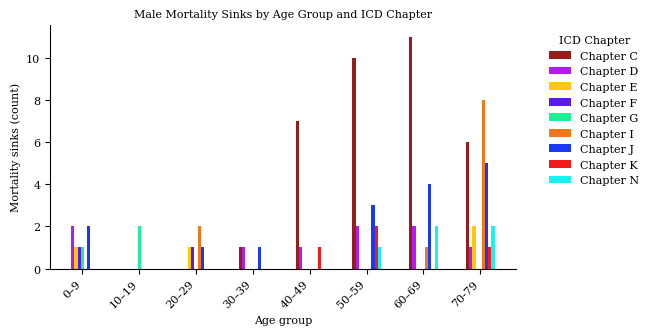

In [17]:
# Male Mortality Sinks by Age Group and ICD Chapter
hex_colors = [
  '#1AF239',  # (26, 242, 57) A
  '#58F21A',  # (88, 242, 26) B
  '#961D1A',  # (150, 29, 26) C
  '#B41AF2',  # (180, 26, 242) D
  '#FFC801',  # (255, 202, 1) E
  '#581AF2',  # (88, 26, 242) F
  '#1AF295',  # (26, 242, 149) G
  '#1A95F2',  # (26, 149, 242) H
  '#F2761A',  # (242, 118, 26) I
  '#1A39F2',  # (26, 57, 242) J
  '#F21A1A',  # (242, 26, 26) K
  '#F21AD3',  # (242, 26, 211) L
  '#B4F21A',  # (180, 242, 26) M
  '#1AF2F2',  # (26, 242, 242) N
]
palette = hex_colors
chapter_color_map = dict(zip(list('ABCDEFGHIJKLMN'), palette))
df['ICD_Chapter'] = df['ICD_Code'].str[0]

unique_chapters = sorted(df['ICD_Chapter'].unique())
chapter_colors = {ch: chapter_color_map.get(ch, '#CCCCCC') for ch in unique_chapters}

chapter_counts = (
    df.groupby(['age_num', 'ICD_Chapter'])
    .size()
    .reset_index(name='count')
)

fig, ax = plt.subplots(figsize=(6.60, 3.40))

n_chapters = len(unique_chapters)
bar_width = 0.8 / n_chapters
offsets_chapter = np.linspace(-0.4 + bar_width / 2, 0.4 - bar_width / 2, n_chapters)

# Wider spacing between age groups
age_ticks = np.arange(1, len(age_labels) + 1)
group_spacing = 1.6
age_positions = age_ticks * group_spacing

for idx, chapter in enumerate(unique_chapters):
    subset = chapter_counts[chapter_counts['ICD_Chapter'] == chapter]
    x = subset['age_num'].map(dict(zip(age_ticks, age_positions)))
    ax.bar(x + offsets_chapter[idx], subset['count'],
           width=bar_width, label=f'Chapter {chapter}', color=chapter_colors[chapter])

ax.set_xticks(age_positions)
ax.set_xticklabels(age_labels, rotation=45, ha='right')

ax.set_xlabel('Age group')
ax.set_ylabel('Mortality sinks (count)')
ax.set_title('Male Mortality Sinks by Age Group and ICD Chapter')
ax.legend(title='ICD Chapter', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
save_figure(fig, 'panel_male_mortality_by_age_icd_chapter')
plt.show()


Saved: ..\..\figures\panel_alluvial_curved_gapped_anchored_by_age_icd_chapter.png
Saved: ..\..\figures\panel_alluvial_curved_gapped_anchored_by_age_icd_chapter.pdf


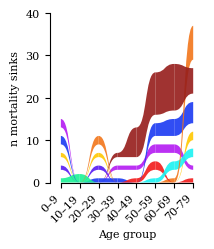

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.lines import Line2D

plt.rcParams.update({"font.size": 10})

# -----------------------------
# Data -> wide matrix
# -----------------------------
df["ICD_Chapter"] = df["ICD_Code"].astype(str).str[0]

counts = (
    df.groupby(["age_num", "ICD_Chapter"])
      .size()
      .reset_index(name="count")
)

ages = sorted(counts["age_num"].unique())
chapters = sorted(counts["ICD_Chapter"].unique())

if 'chapter_color_map' not in globals():
    chapter_color_map = dict(zip(list('ABCDEFGHIJKLMN'), palette))
chapter_colors = {ch: chapter_color_map.get(ch, '#CCCCCC') for ch in chapters}

wide = (counts
        .pivot(index="age_num", columns="ICD_Chapter", values="count")
        .reindex(index=ages, columns=chapters)
        .fillna(0.0))

# -----------------------------
# X positions + labels
# -----------------------------
group_spacing = 1.6
x = np.arange(len(ages)) * group_spacing

# robust label mapping
if isinstance(age_labels, (list, tuple)):
    if min(ages) == 0 and max(ages) < len(age_labels):
        age_label_map = {a: age_labels[a] for a in ages}
    elif min(ages) == 1 and max(ages) <= len(age_labels):
        age_label_map = {a: age_labels[a - 1] for a in ages}
    else:
        age_label_map = {a: str(a) for a in ages}
else:
    age_label_map = {a: str(a) for a in ages}

# -----------------------------
# Layout parameters (tune)
# -----------------------------
gap = 2.0          # vertical gap between ribbons WITHIN each age column (in "count units")
curviness = 0.55   # 0..1, higher = curvier
alpha = 0.90
min_height = 0.0   # set >0 to drop tiny ribbons

# -----------------------------
# Compute stacked intervals per age
# - "largest on top" at each age
# - anchored at 0 (NO centering)
# -----------------------------
y0 = {a: {} for a in ages}
y1 = {a: {} for a in ages}
column_heights = {}

for a in ages:
    row = wide.loc[a].to_dict()

    # order chapters by count desc (largest will end on top)
    ordered = sorted(chapters, key=lambda ch: row[ch], reverse=True)

    cum = 0.0
    nonzero = 0
    for ch in ordered[::-1]:  # stack bottom->top
        h = float(row[ch])
        if h <= 0:
            y0[a][ch] = cum
            y1[a][ch] = cum
            continue

        y0[a][ch] = cum
        y1[a][ch] = cum + h
        cum += h
        nonzero += 1

        # add gap after each nonzero stratum except the last one (handled below)
        cum += gap

    # remove trailing gap so total height matches: sum(counts) + gap*(k-1)
    if nonzero > 0:
        cum -= gap

    column_heights[a] = cum

max_height = max(column_heights.values()) if column_heights else 1.0

# -----------------------------
# Helper: curved ribbon (cubic Bezier)
# -----------------------------
def ribbon_path(x0, b0, t0, x1, b1, t1, bend=0.55):
    dx = x1 - x0
    cdx = dx * bend

    codes = [
        Path.MOVETO,
        Path.CURVE4, Path.CURVE4, Path.CURVE4,  # top edge
        Path.LINETO,
        Path.CURVE4, Path.CURVE4, Path.CURVE4,  # bottom edge
        Path.CLOSEPOLY
    ]
    verts = [
        (x0, t0),
        (x0 + cdx, t0),
        (x1 - cdx, t1),
        (x1, t1),
        (x1, b1),
        (x1 - cdx, b1),
        (x0 + cdx, b0),
        (x0, b0),
        (x0, t0)
    ]
    return Path(verts, codes)

# -----------------------------
# Build and draw ribbons
# -----------------------------
fig, ax = plt.subplots(figsize=(2.00, 2.20))

ribbons = []
for i in range(len(ages) - 1):
    a0, a1 = ages[i], ages[i + 1]
    x0, x1 = x[i], x[i + 1]

    for ch in chapters:
        h0 = y1[a0][ch] - y0[a0][ch]
        h1 = y1[a1][ch] - y0[a1][ch]
        if max(h0, h1) <= min_height:
            continue

        path = ribbon_path(
            x0, y0[a0][ch], y1[a0][ch],
            x1, y0[a1][ch], y1[a1][ch],
            bend=curviness
        )
        ribbons.append((max(h0, h1), ch, path))

# draw thin -> thick so big ones sit on top
ribbons.sort(key=lambda t: t[0])

for _, ch, path in ribbons:
    ax.add_patch(PathPatch(path, facecolor=chapter_colors[ch], edgecolor="none", alpha=alpha))

# -----------------------------
# Axes / labels
# -----------------------------
ax.set_xlim(x.min() - group_spacing * 0.6, x.max() + group_spacing * 0.6)
ax.set_ylim(0, 40)

ax.set_xticks(x)
ax.set_xticklabels([age_label_map[a] for a in ages], rotation=45, ha="right")

ax.set_xlabel("Age group")
ax.set_ylabel("n mortality sinks")
ax.set_title("")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["bottom"].set_bounds(x.min(), x.max())
ax.spines["left"].set_bounds(0, 40)

# legend
handles = [Line2D([0], [0], color=chapter_colors[ch], lw=8) for ch in chapters]
# ax.legend(handles, [f"Chapter {ch}" for ch in chapters],
#           title="ICD Chapter", frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")

save_figure(fig, "panel_alluvial_curved_gapped_anchored_by_age_icd_chapter")
plt.show()


Saved: ..\..\figures\panel_alluvial_curved_gapped_by_age_icd_chapter.png
Saved: ..\..\figures\panel_alluvial_curved_gapped_by_age_icd_chapter.pdf


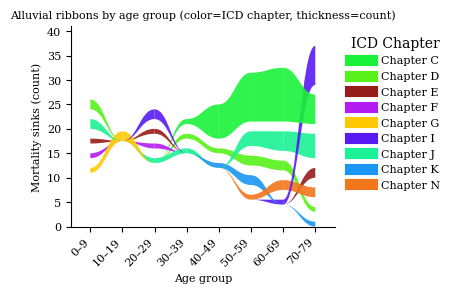

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.lines import Line2D

# -----------------------------
# Data -> wide matrix
# -----------------------------
df["ICD_Chapter"] = df["ICD_Code"].astype(str).str[0]

counts = (
    df.groupby(["age_num", "ICD_Chapter"])
      .size()
      .reset_index(name="count")
)

ages = sorted(counts["age_num"].unique())
chapters = sorted(counts["ICD_Chapter"].unique())

if 'chapter_color_map' not in globals():
    chapter_color_map = dict(zip(list('ABCDEFGHIJKLMN'), palette))
chapter_colors = {ch: chapter_color_map.get(ch, '#CCCCCC') for ch in chapters}

wide = (counts
        .pivot(index="age_num", columns="ICD_Chapter", values="count")
        .reindex(index=ages, columns=chapters)
        .fillna(0.0))

# -----------------------------
# X positions + labels
# -----------------------------
group_spacing = 1.6
x = np.arange(len(ages)) * group_spacing

# map age labels robustly
if isinstance(age_labels, (list, tuple)):
    if min(ages) == 0 and max(ages) < len(age_labels):
        age_label_map = {a: age_labels[a] for a in ages}
    elif min(ages) == 1 and max(ages) <= len(age_labels):
        age_label_map = {a: age_labels[a - 1] for a in ages}
    else:
        age_label_map = {a: str(a) for a in ages}
else:
    age_label_map = {a: str(a) for a in ages}

# -----------------------------
# Layout parameters (tune these)
# -----------------------------
gap = 2.0          # <--- MORE GAP between ribbons (in "count units")
curviness = 0.45   # <--- 0..1, higher = more curved
alpha = 0.90
min_height = 0.0   # set e.g. 1.0 to drop tiny ribbons

# -----------------------------
# Compute per-age stacked intervals with gaps + "largest on top"
# -----------------------------
y0 = {a: {} for a in ages}
y1 = {a: {} for a in ages}
totals = []

for a in ages:
    row = wide.loc[a].to_dict()

    # order by count desc at this age (largest on top)
    ordered = sorted(chapters, key=lambda ch: row[ch], reverse=True)

    # stack bottom->top with gaps (so largest ends up on top)
    cum = 0.0
    for ch in ordered[::-1]:
        h = float(row[ch])
        if h <= 0:
            y0[a][ch] = cum
            y1[a][ch] = cum
            continue
        y0[a][ch] = cum
        y1[a][ch] = cum + h
        cum += h + gap  # add gap after each stratum
    totals.append(cum - gap if cum > 0 else 0)

max_total = max(totals) if totals else 1.0

# Center columns vertically (optional but usually nicer)
for a in ages:
    total = float(sum((y1[a][ch] - y0[a][ch]) for ch in chapters) +
                  gap * max(0, sum((wide.loc[a, ch] > 0) for ch in chapters) - 1))
    shift = 0.5 * (max_total - total)
    for ch in chapters:
        y0[a][ch] += shift
        y1[a][ch] += shift

# -----------------------------
# Helper: make a curved ribbon between (x0, y0b..y0t) and (x1, y1b..y1t)
# Uses cubic Bezier curves for top and bottom edges.
# -----------------------------
def ribbon_path(x0, b0, t0, x1, b1, t1, bend=0.45):
    dx = x1 - x0
    cdx = dx * bend

    # Top edge cubic: (x0,t0) -> (x1,t1)
    top = [
        (Path.MOVETO, (x0, t0)),
        (Path.CURVE4, (x0 + cdx, t0)),
        (Path.CURVE4, (x1 - cdx, t1)),
        (Path.CURVE4, (x1, t1)),
    ]
    # Bottom edge cubic back: (x1,b1) -> (x0,b0)
    bot = [
        (Path.LINETO, (x1, b1)),
        (Path.CURVE4, (x1 - cdx, b1)),
        (Path.CURVE4, (x0 + cdx, b0)),
        (Path.CURVE4, (x0, b0)),
        (Path.CLOSEPOLY, (x0, t0)),
    ]

    codes, verts = zip(*(top + bot))
    return Path(verts, codes)

# -----------------------------
# Draw
# -----------------------------
fig, ax = plt.subplots(figsize=(3.40, 2.60))

# Draw thinner ribbons first, thicker last (so big ones sit on top visually)
ribbons = []
for i in range(len(ages) - 1):
    a0, a1 = ages[i], ages[i + 1]
    x0, x1 = x[i], x[i + 1]

    for ch in chapters:
        h0 = y1[a0][ch] - y0[a0][ch]
        h1 = y1[a1][ch] - y0[a1][ch]
        if max(h0, h1) <= min_height:
            continue

        path = ribbon_path(
            x0, y0[a0][ch], y1[a0][ch],
            x1, y0[a1][ch], y1[a1][ch],
            bend=curviness
        )
        ribbons.append((max(h0, h1), ch, path))

# sort by thickness: draw small -> large
ribbons.sort(key=lambda t: t[0])

for _, ch, path in ribbons:
    patch = PathPatch(
        path,
        facecolor=chapter_colors[ch],
        edgecolor="none",
        alpha=alpha
    )
    ax.add_patch(patch)

# Axes formatting
ax.set_xlim(x.min() - group_spacing * 0.6, x.max() + group_spacing * 0.6)
ax.set_ylim(0, max_total + gap * 2)

ax.set_xticks(x)
ax.set_xticklabels([age_label_map[a] for a in ages], rotation=45, ha="right")

ax.set_xlabel("Age group")
ax.set_ylabel("Mortality sinks (count)")
ax.set_title("Alluvial ribbons by age group (color=ICD chapter, thickness=count)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

handles = [Line2D([0], [0], color=chapter_colors[ch], lw=8) for ch in chapters]
ax.legend(handles, [f"Chapter {ch}" for ch in chapters],
          title="ICD Chapter", frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")

save_figure(fig, "panel_alluvial_curved_gapped_by_age_icd_chapter")
plt.show()


Saved: ..\..\figures\panel_male_mortality_streamgraph_by_age_icd_chapter.png
Saved: ..\..\figures\panel_male_mortality_streamgraph_by_age_icd_chapter.pdf


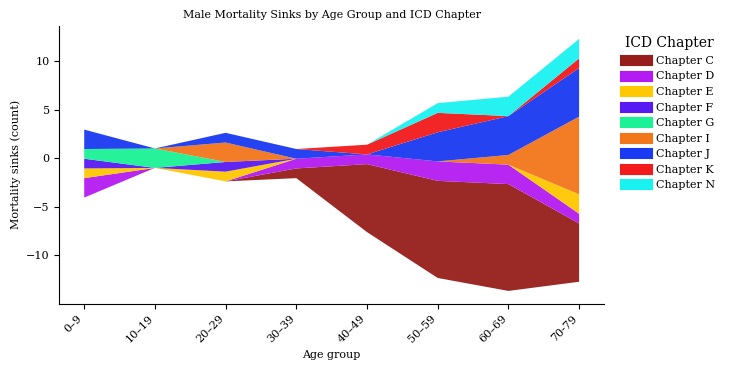

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
male_df = df
# --- prep chapter + counts (same idea as your code) ---
male_df["ICD_Chapter"] = male_df["ICD_Code"].str[0]

chapter_counts = (
    male_df.groupby(["age_num", "ICD_Chapter"])
    .size()
    .reset_index(name="count")
)

# Ensure consistent order on x and for chapters
age_ticks = np.arange(1, len(age_labels) + 1)

unique_chapters = sorted(chapter_counts["ICD_Chapter"].unique())
chapter_colors = {ch: chapter_color_map.get(ch, '#CCCCCC') for ch in unique_chapters}

# Pivot -> rows are ages, columns are chapters
wide = (
    chapter_counts
    .pivot(index="age_num", columns="ICD_Chapter", values="count")
    .reindex(age_ticks)                 # keep all ages in order
    .fillna(0)
)

# X positions (your wider spacing trick)
group_spacing = 1.6
x = age_ticks * group_spacing

# Y series in chapter order
ys = [wide[ch].to_numpy() for ch in unique_chapters]
colors = [chapter_colors[ch] for ch in unique_chapters]

fig, ax = plt.subplots(figsize=(7.40, 3.80))

# --- streamgraph ---
ax.stackplot(
    x,
    ys,
    colors=colors,
    baseline="wiggle",   # <- streamgraph feel (like the example figure)
    alpha=0.95,
    linewidth=0.0
)

# Axes / labels
ax.set_xticks(x)
ax.set_xticklabels(age_labels, rotation=45, ha="right")
ax.set_xlabel("Age group")
ax.set_ylabel("Mortality sinks (count)")
ax.set_title("Male Mortality Sinks by Age Group and ICD Chapter")

# Legend (keep order consistent)
handles = [plt.Line2D([0], [0], color=chapter_colors[ch], lw=8) for ch in unique_chapters]
labels = [f"Chapter {ch}" for ch in unique_chapters]
ax.legend(handles, labels, title="ICD Chapter", frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")

# Clean look like the figure
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.tight_layout()
save_figure(fig, "panel_male_mortality_streamgraph_by_age_icd_chapter")
plt.show()


In [ ]:
diseases = df_high['Description_Eng'].unique()
print(diseases)


['Other anemias' 'Mixed specific developmental disorders'
 'Respiratory failure, not elsewhere classified'
 'Epilepsy and recurrent seizures' 'Overweight and obesity'
 'Eating disorders' 'Essential (primary) hypertension'
 'Pulmonary embolism' 'Malignant neoplasm of breast'
 'Malignant neoplasm of bronchus and lung'
 'Malignant neoplasm of cervix uteri'
 'Secondary malignant neoplasm of respiratory and digestive organs'
 'Paralytic ileus and intestinal obstruction without hernia'
 'Malignant neoplasm of colon' 'Malignant neoplasm of ovary'
 'Malignant neoplasm of brain'
 'Secondary malignant neoplasm of other and unspecified sites'
 'Other chronic obstructive pulmonary disease'
 'Malignant neoplasm of corpus uteri'
 'Pleural effusion, not elsewhere classified'
 'Chronic kidney disease (CKD)' 'Type 2 diabetes mellitus'
 'Chronic ischemic heart disease' 'Atrial fibrillation and flutter'
 'Heart failure' 'Pneumonia, unspecified organism'
 'Other disorders of fluid, electrolyte and acid-ba

: 

Saved: ..\..\figures\panel_disease_by_age_heatmap.png
Saved: ..\..\figures\panel_disease_by_age_heatmap.pdf


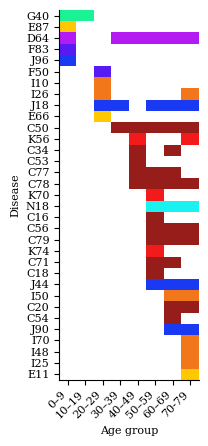

: 

In [ ]:
# Heatmap: diseases by age (colored by ICD chapter, matching alluvial colors)
# Use short ICD codes on the y-axis.

# Map disease -> ICD code (first occurrence)
desc_to_icd = {}
for d, icd in zip(df_high['Description_Eng'], df_high['ICD_Code']):
    if pd.notna(d) and pd.notna(icd):
        desc_to_icd[str(d)] = str(icd)

def icd_to_chapter(icd):
    if not icd or pd.isna(icd):
        return 'Unknown'
    return str(icd)[0]

def short_icd(icd):
    # Keep the core ICD prefix (before any dot)
    if not icd or pd.isna(icd):
        return 'NA'
    return str(icd).split('.', 1)[0]

# Disease-by-age counts
heatmap_data = (
    df_high.groupby(['Description_Eng', 'age_num'])
    .size()
    .unstack(fill_value=0)
)

# Force full age axis (1..8) to align with labels
age_ticks = np.arange(1, len(age_labels) + 1)
heatmap_data = heatmap_data.reindex(columns=age_ticks, fill_value=0)

# Order diseases by first age group they appear in
present = heatmap_data.values > 0
first_age_present = present.argmax(axis=1)
first_age_present[~present.any(axis=1)] = heatmap_data.shape[1]
sorted_idx = np.argsort(first_age_present)
heatmap_data_sorted = heatmap_data.iloc[sorted_idx]
disease_names = heatmap_data_sorted.index.tolist()
n_diseases, n_ages = heatmap_data_sorted.shape

present = heatmap_data_sorted.values > 0
color_idx = np.tile(np.arange(n_diseases)[:, None], (1, n_ages))
masked_idx = np.ma.masked_where(~present, color_idx)

# Chapter colors (same palette as alluvial)
chapters = []
short_codes = []
for name in disease_names:
    icd = desc_to_icd.get(name, None)
    chapters.append(icd_to_chapter(icd))
    short_codes.append(short_icd(icd))

unique_chapters = sorted(set(chapters))
hex_colors = [
  '#1AF239',  # (26, 242, 57) A
  '#58F21A',  # (88, 242, 26) B
  '#961D1A',  # (150, 29, 26) C
  '#B41AF2',  # (180, 26, 242) D
  '#FFC801',  # (255, 202, 1) E
  '#581AF2',  # (88, 26, 242) F
  '#1AF295',  # (26, 242, 149) G
  '#1A95F2',  # (26, 149, 242) H
  '#F2761A',  # (242, 118, 26) I
  '#1A39F2',  # (26, 57, 242) J
  '#F21A1A',  # (242, 26, 26) K
  '#F21AD3',  # (242, 26, 211) L
  '#B4F21A',  # (180, 242, 26) M
  '#1AF2F2',  # (26, 242, 242) N
]
palette = hex_colors
chapter_color_map = dict(zip(list('ABCDEFGHIJKLMN'), palette))
chapter_colors = {ch: chapter_color_map.get(ch, '#CCCCCC') for ch in unique_chapters}

row_colors = [chapter_colors[ch] for ch in chapters]
cmap = plt.matplotlib.colors.ListedColormap(row_colors)
cmap.set_bad(color='white')

fig_disease, ax_disease = plt.subplots(figsize=(1.80, 4.80))
im = ax_disease.imshow(masked_idx, aspect='auto', cmap=cmap, interpolation='none',
                        vmin=0, vmax=n_diseases - 1)

ax_disease.set_xticks(range(n_ages))
ax_disease.set_xticklabels(age_labels, rotation=45, fontsize=8, ha='right')
ax_disease.set_yticks(range(n_diseases))
ax_disease.set_yticklabels(short_codes, fontsize=8)
ax_disease.set_xlabel('Age group')
ax_disease.set_ylabel('Disease')

ax_disease.spines['top'].set_visible(False)
ax_disease.spines['right'].set_visible(False)

save_figure(fig_disease, 'panel_disease_by_age_heatmap')
plt.show()


Saved: ..\..\figures\legend_disease_by_age_heatmap_icd_chapter.png
Saved: ..\..\figures\legend_disease_by_age_heatmap_icd_chapter.pdf


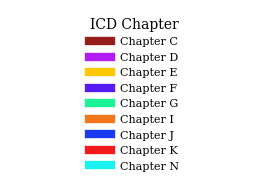

In [23]:
# Legend-only figure for the heatmap (ICD chapters)
fig, ax = plt.subplots(figsize=(3.20, 2.20))
ax.axis('off')

legend_handles = [plt.Line2D([0], [0], color=chapter_colors[ch], lw=6) for ch in unique_chapters]
legend_labels = [f'Chapter {ch}' for ch in unique_chapters]
ax.legend(legend_handles, legend_labels, title='ICD Chapter', frameon=False,
          loc='center')

save_figure(fig, 'legend_disease_by_age_heatmap_icd_chapter')
plt.show()


Saved: ..\..\figures\legend_disease_by_age_heatmap_icd_chapter.png
Saved: ..\..\figures\legend_disease_by_age_heatmap_icd_chapter.pdf


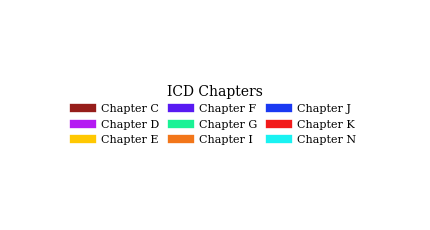

In [24]:
# Legend-only figure for the heatmap (ICD chapters) - three columns
fig, ax = plt.subplots(figsize=(4.40, 2.40))
ax.axis('off')

legend_handles = [plt.Line2D([0], [0], color=chapter_colors[ch], lw=6) for ch in unique_chapters]
legend_labels = [f'Chapter {ch}' for ch in unique_chapters]

ax.legend(legend_handles, legend_labels, title='ICD Chapters', frameon=False,
          loc='center', ncol=3, columnspacing=1.2, handlelength=1.6)

fig.tight_layout()
save_figure(fig, 'legend_disease_by_age_heatmap_icd_chapter')
plt.show()


Saved: ..\..\figures\legend_sex.png
Saved: ..\..\figures\legend_sex.pdf


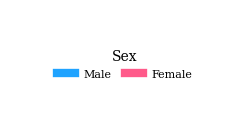

In [203]:
# Legend-only figure for Sex (two columns)
fig, ax = plt.subplots(figsize=(2.60, 1.40))
ax.axis('off')

sex_colors = {'Male': '#1FA3FF', 'Female': '#FF5A8A'}
legend_handles = [plt.Line2D([0], [0], color=sex_colors[s], lw=6) for s in ['Male', 'Female']]
legend_labels = ['Male', 'Female']

ax.legend(legend_handles, legend_labels, title='Sex', frameon=False,
          loc='center', ncol=2, columnspacing=1.2, handlelength=1.6)

fig.tight_layout()
save_figure(fig, 'legend_sex')
plt.show()
